# SeSiMe
### Sentence/Sequence Similarity Measure

### (2) Mass spec side
Import MS data and create documents.

Here: Use NOT Crusemann data, but other dataset where smilea are known for all spectra.
### here: GNPS Dataset of 11134 spectra with smiles.

In [2]:
# data locations
# Windows 
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "\\Data\\labeled_MS_data\\"
PATH_SAVE_DATA = ROOT + "\\SeSiMe\\data\\"
PATH_SESIME = ROOT + "\\SeSiMe\\"

PATH_NPLINKER = ROOT + "\\nplinker\\prototype\\"
#mgf_file = PATH_MS_DATA + "GNPSLibraries_allSMILES.mgf"
mgf_file = PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs.mgf"

In [3]:
# import general packages
import sys
sys.path.insert(0, PATH_NPLINKER)
sys.path.insert(0, PATH_SESIME)

import helper_functions as functions
import MS_functions

import numpy as np
from metabolomics import load_spectra

In [4]:
# Import / Load data
results_file = "filtered_data_test.json"

spectra1, spectra_dict1, MS_documents1, MS_documents_intensity1 = MS_functions.load_MGF_data(PATH_SAVE_DATA,
                  mgf_file, 
                 results_file = results_file,
                 num_decimals = 2,
                 min_frag = 0.0, max_frag = 1000.0,
                 min_loss = 10.0, max_loss = 200.0,
                 exp_intensity_filter = 0.01,
                 min_peaks = 10,
                 peaks_per_mz = 20/200)

Spectra json file found and loaded.


## Documents

+ Peaks were removed using an exponential fit to the peak intensity distribution. 
+ Worudocuments wh

In [6]:
# Have a look at how a document looks like:
print(MS_documents1[0])

['peak_74.73', 'peak_79.02', 'peak_89.02', 'peak_89.04', 'peak_90.05', 'peak_95.05', 'peak_98.98', 'peak_105.04', 'peak_107.05', 'peak_117.03', 'peak_118.04', 'peak_134.67', 'peak_135.05', 'peak_135.28', 'peak_136.05', 'peak_137.00', 'peak_137.15', 'peak_145.03', 'peak_147.12', 'peak_160.09', 'peak_161.08', 'peak_162.59', 'peak_163.04', 'peak_163.08', 'peak_163.29', 'peak_164.04', 'peak_165.00', 'peak_165.40', 'peak_166.30', 'peak_167.15', 'peak_168.17', 'peak_172.58', 'peak_175.08', 'peak_181.06', 'peak_229.03', 'peak_237.01', 'peak_330.10', 'peak_330.14', 'loss_93.11', 'loss_101.09', 'loss_149.06', 'loss_155.04', 'loss_157.54', 'loss_161.95', 'loss_162.97', 'loss_163.82', 'loss_164.72', 'loss_165.11', 'loss_166.08', 'loss_166.83', 'loss_167.04', 'loss_167.08', 'loss_167.53', 'loss_169.04', 'loss_170.03', 'loss_183.00', 'loss_185.09', 'loss_192.96', 'loss_193.12', 'loss_194.07', 'loss_194.84', 'loss_195.07', 'loss_195.45']


In [7]:
len(MS_documents1)  # number of spectra = number of documents

9565

#### Switch to general SeSiMe functionality
Once we have a corpus (e.g. through cells above), we can use SeSiMe to apply different similarity measuring methds. 

In [8]:
from Similarities import SimilarityMeasures

MS_measure = SimilarityMeasures(MS_documents1)

Using TensorFlow backend.


In [9]:
MS_measure.preprocess_documents(0.2, create_stopwords = False)

Preprocess documents...


### Word2Vec -based approach
Create Word2Vec based document centroid vectors.

Since spectra are built from manyn more possible words (much larger "dictionary"), vectors are reduced to 200 (instead of 100) dimensions.

In [10]:
file_model_word2vec = PATH_SAVE_DATA + 'model_w2v_MS_gnps_uniquesmiles_d200_2dec.model'
MS_measure.build_model_word2vec(file_model_word2vec, size=200, window=50, 
                             min_count=1, workers=4, iter=250, 
                             use_stored_model=True)

Load stored word2vec model ...


In [11]:
MS_measure.get_vectors_centroid(weighted=True)
MS_measure.get_centroid_distances(num_hits=25, method='cosine')

  Calculated centroid vectors for  9565  of  9565  documents.

This has calculated (cosine) distances between all spectra in an all-vs-all fashion.
The "num_hits" closest candidates for each spectrum are listed in two matrices.

One stores the distances, the other the respective IDs.

In [12]:
MS_measure.Cdistances_ctr[1,:]

array([0.        , 0.32536842, 0.33265039, 0.33281906, 0.35899758,
       0.35997445, 0.37254436, 0.37354854, 0.37866349, 0.38444233,
       0.39130187, 0.39902822, 0.40068601, 0.40208931, 0.40602087,
       0.4084805 , 0.40977336, 0.41014473, 0.411345  , 0.41312871,
       0.4135957 , 0.41630408, 0.41770898, 0.41782789, 0.42474333])

In [13]:
MS_measure.Cdistances_ctr_idx[1,:]

array([   1,  137, 8757, 5147, 1671, 5242,   68, 1048,   79, 1091,  454,
       1064, 8779,   30,   56,  304, 2443, 1017,  619, 1444,  559,  244,
       2079, 2037, 6220])

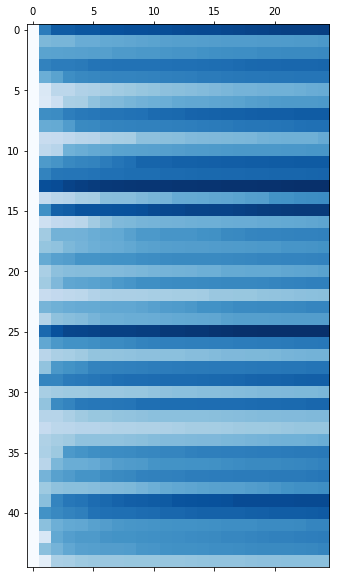

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(MS_measure.Cdistances_ctr[:45,:25], cmap=plt.cm.Blues)

### Plot molecules from smiles to visually compare selected spectra

In [15]:
print(len(MS_measure.dictionary))

56520


[0.         0.05460844 0.08490094 0.11123085 0.16248275 0.18306522
 0.19270665 0.20366995 0.21207569 0.21613905]


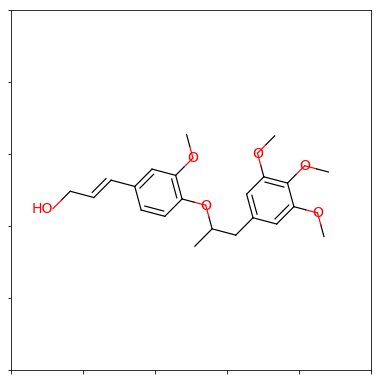

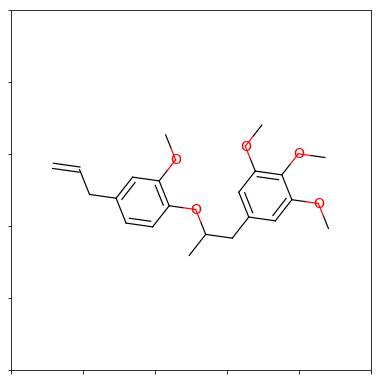

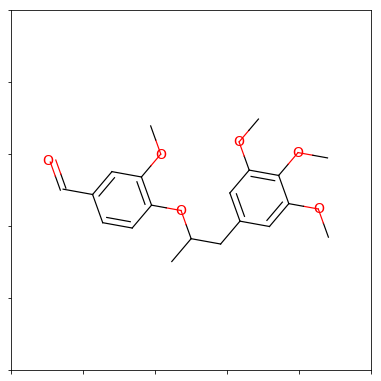

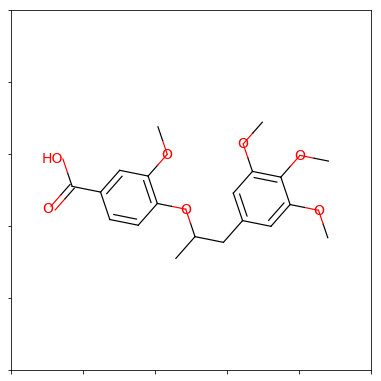

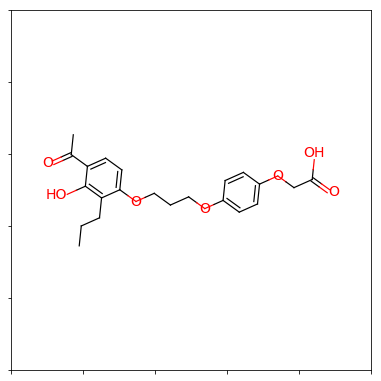

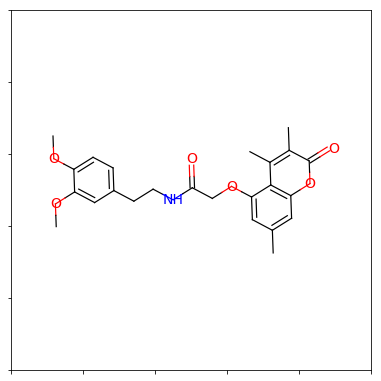

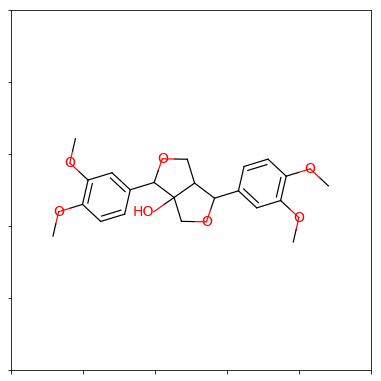

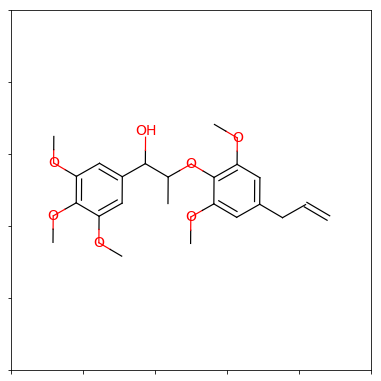

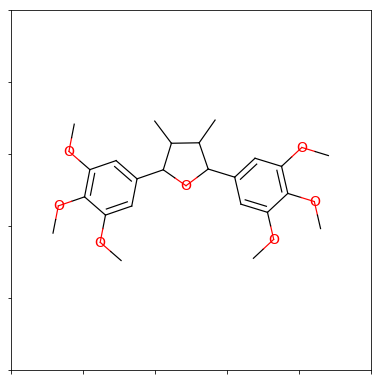

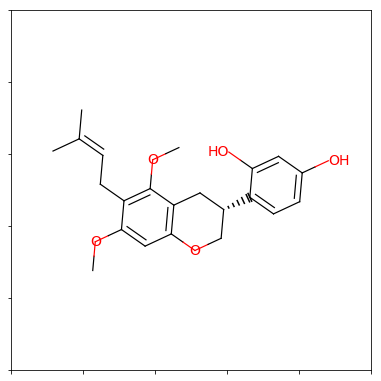

In [78]:
query_id = 110
print(MS_measure.Cdistances_ctr[query_id, :10])
MS_functions.plot_smiles(query_id, spectra_dict1, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

### Try different similarity measuring methods...

#### A) Autoencoder
Will train a deep autoencoder to generate 100 dimensional (or = encoding_dim) vectors representing each document. 

In [81]:
file_model_ae = PATH_SAVE_DATA + 'model_autoencoder_MS_uniquesmiles2.h5'
file_model_encoder = PATH_SAVE_DATA + 'model_encoder_MS_uniquesmiles2.h5'
MS_measure.build_autoencoder(file_model_ae, file_model_encoder, 
                             epochs = 8, batch_size = 1024, encoding_dim = 300,
                            layer_factors = (1, 1, 1))

No stored model found!
Creating new autoencoder model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 300)               16956300  
_________________________________________________________________
dense_11 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_12 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_14 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_15 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_16 (Dense)   

In [82]:
MS_measure.get_autoencoder_distances(num_hits=25, method='cosine')

[0.00000000e+00 1.08270215e-07 1.39865922e-07 2.50640856e-07
 2.71289795e-07 2.73772700e-07 2.87246752e-07 3.04670363e-07
 3.12957884e-07 3.16611003e-07]


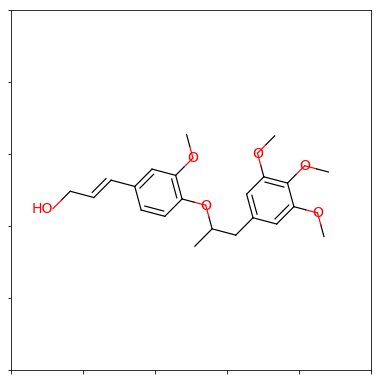

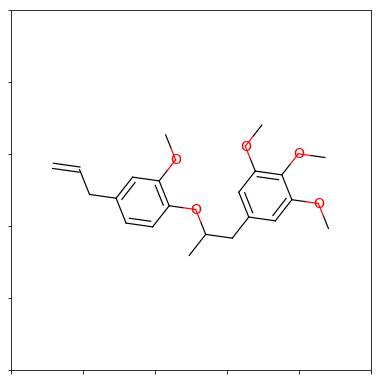

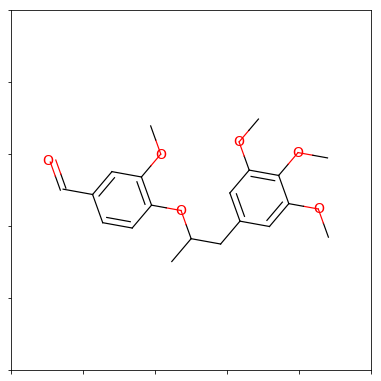

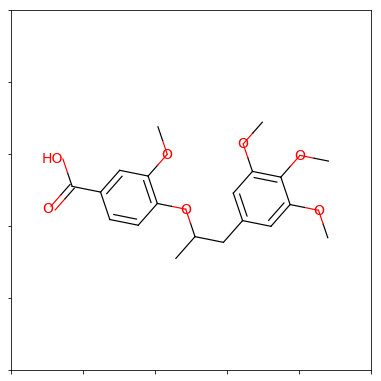

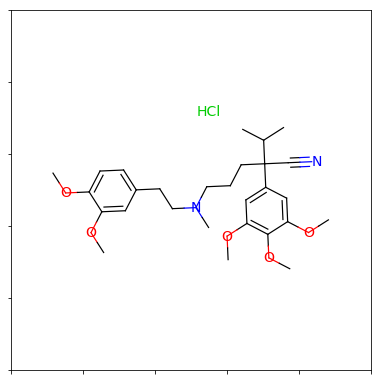

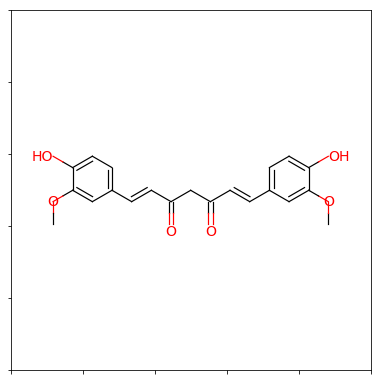

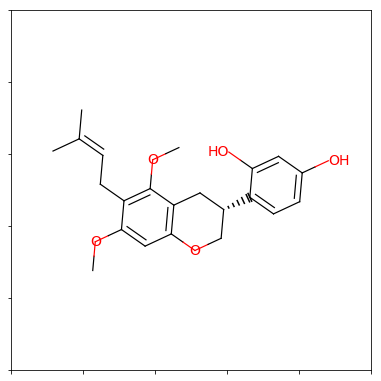

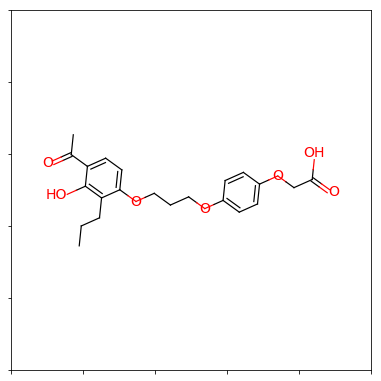

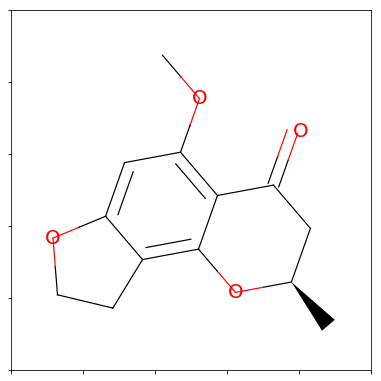

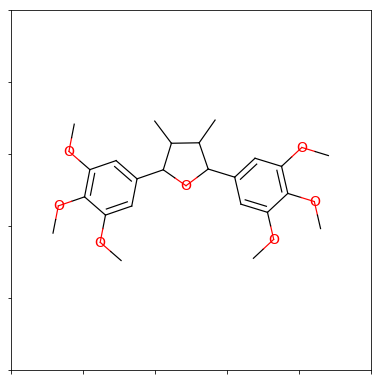

In [83]:
query_id = 110
print(MS_measure.Cdistances_ae[query_id, :10])
MS_functions.plot_smiles(query_id, spectra_dict1, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "autoencoder")

#### B) PCA
Will calulate 300 dimensional representations of each document using PCA.

In [69]:
MS_measure.get_vectors_pca(300)

In [70]:
MS_measure.get_pca_distances(num_hits=25, method='cosine')

[1.11022302e-16 1.34778035e-01 1.87372251e-01 2.35544399e-01
 3.17293470e-01 3.22967926e-01 3.68596064e-01 4.07776146e-01
 4.14090705e-01 4.18957916e-01]


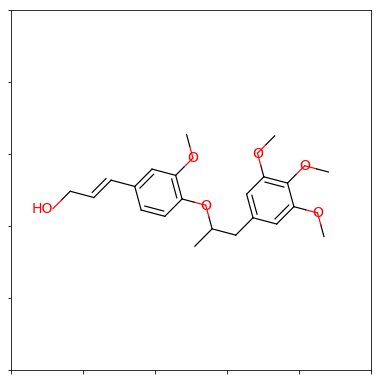

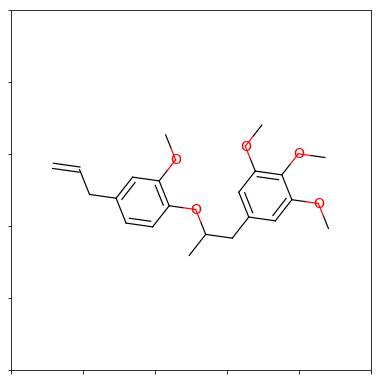

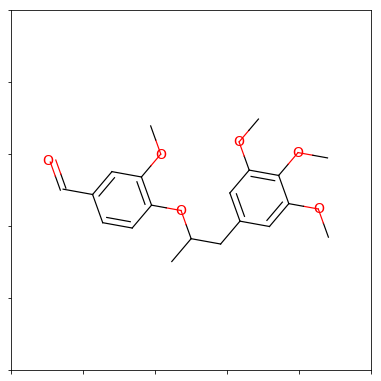

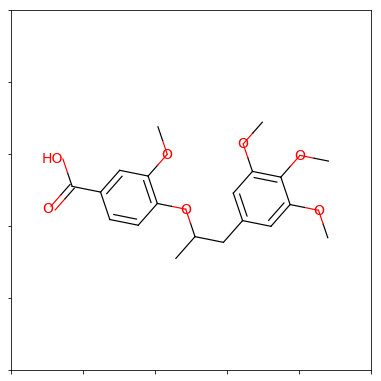

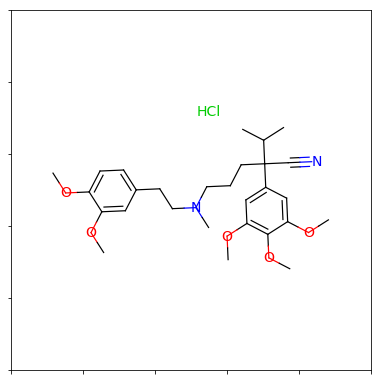

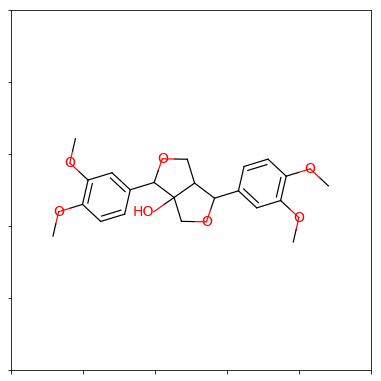

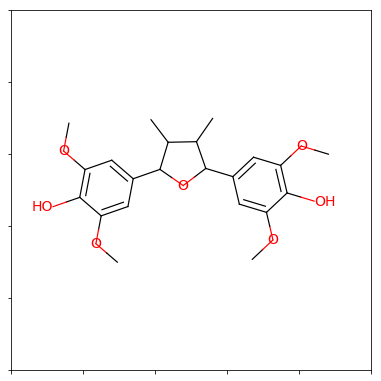

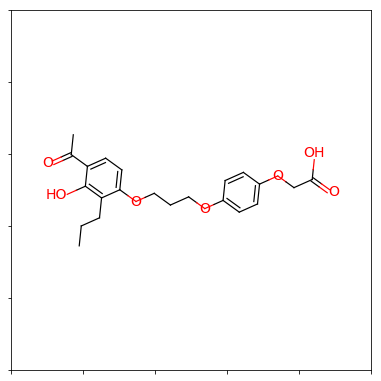

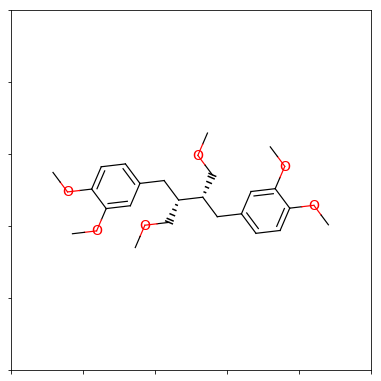

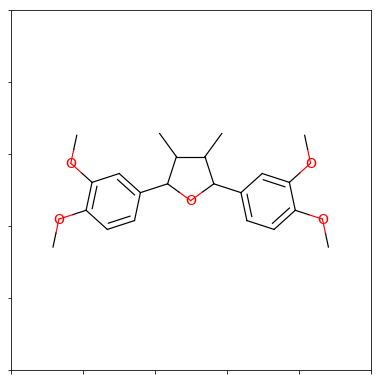

In [84]:
query_id = 110
print(MS_measure.Cdistances_pca[query_id, :10])
MS_functions.plot_smiles(query_id, spectra_dict1, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "pca")